In [1]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READ DATA
data_file_path = "/Users/gandalf/Documents/coding/do_not_commit/capstone/"
website_file_path = '/Users/gandalf/Documents/coding/rczyrnik.github.io/capstone/'

X_train = np.load(data_file_path+'X_train.npy')
X_test = np.load(data_file_path+'X_test.npy')
y_train = np.load(data_file_path+'y_train.npy')
y_test = np.load(data_file_path+'y_test.npy')
cols = np.load(data_file_path+'cols.npy')

In [3]:
# CREATE FUNCTION
def gridsearching(param, grid, model):
    random_search = GridSearchCV(model, param_grid=grid, scoring='f1', n_jobs=-1, cv=10)
    random_search.fit(X_train, y_train)

    temp = "param_"+param
    df = pd.DataFrame(random_search.cv_results_)
    df = df.drop(['params'], axis=1)
    df[[temp,"mean_test_score","mean_train_score","std_test_score","std_train_score"]]

    plt.plot(df[temp], df.mean_train_score)
    plt.plot(df[temp], df.mean_test_score)

    plt.xlabel(param)
    plt.ylabel("f1 score")
    plt.show()
    
    return df

# learning_rate

In [ ]:
%%time

param = "learning_rate"
gradient_boosting_grid={
                    "learning_rate": [.001, .01, .1, 1],
}

df_learning_rate = gridsearching(param, gradient_boosting_grid, GradientBoostingClassifier())

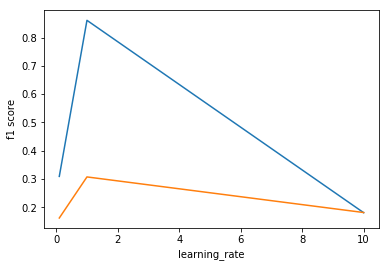

CPU times: user 9.34 s, sys: 458 ms, total: 9.8 s
Wall time: 2min 32s


In [8]:
%%time

param = "learning_rate"
gradient_boosting_grid={
                    "learning_rate": [.1, 1, 10],
}

df_learning_rate = gridsearching(param, gradient_boosting_grid, GradientBoostingClassifier())

# n_estimators

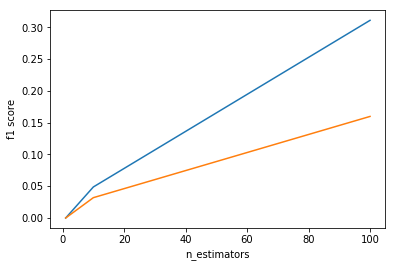

CPU times: user 8.57 s, sys: 416 ms, total: 8.98 s
Wall time: 1min 7s


In [10]:
%%time

param = "n_estimators"
gradient_boosting_grid={
                    "n_estimators": [1, 10, 100],
}

df_n_estimators = gridsearching(param, gradient_boosting_grid, GradientBoostingClassifier())

# max_depth

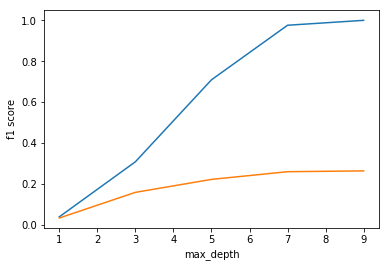

CPU times: user 55.5 s, sys: 888 ms, total: 56.4 s
Wall time: 11min 57s


In [12]:
%%time

param = "max_depth"
gradient_boosting_grid={
                    "max_depth": [1, 3, 5, 7, 9],
}

df_max_depth = gridsearching(param, gradient_boosting_grid, GradientBoostingClassifier())

# criterion

In [ ]:
%%time

param = "criterion"
gradient_boosting_grid={
                    "criterion": [1, 3, 5, 7, 9],
}

df_criterion = gridsearching(param, gradient_boosting_grid, GradientBoostingClassifier())

Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman, “mse” for mean squared error, and “mae” for the mean absolute error.